In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
os.getcwd()
files_path = "C:/Users/ncr/Desktop/Mis Documentos/2021 Diplomado Ciencia de Datos/20220108 Examen/02 Datos" #Elegir la ruta
files = os.listdir(files_path)

In [3]:
pd.set_option('display.max_columns', 500) # La opción para definir el número de columnas que deseo que pandas imprimr

In [4]:
# Lectura de archivo JSON
import json
with open(files_path + '/' + "column_remapping.json") as f:
  column_remapping = json.load(f)

# LECTURA DE ARCHIVOS CSV

In [5]:
# Lectura de archivos csv
# Debido al tamanio de los archivos leeremos uno a uno y le eliminare las variables que no usamos para el examen
eliminar = ["dropoff_longitude",
            "dropoff_latitude",
            "pickup_longitude",
            "pickup_latitude",
            "trip_start_timestamp",
            "trip_end_timestamp",
            "pickup_census_tract",
            "dropoff_census_tract",
            "pickup_community_area",
            "dropoff_community_area",
            "fare"]

archivos = ["chicago_taxi_trips_2016_01.csv",
            "chicago_taxi_trips_2016_02.csv",
            "chicago_taxi_trips_2016_03.csv",
            "chicago_taxi_trips_2016_04.csv",
            "chicago_taxi_trips_2016_05.csv",
            "chicago_taxi_trips_2016_06.csv",
            "chicago_taxi_trips_2016_07.csv",
            "chicago_taxi_trips_2016_08.csv",
            "chicago_taxi_trips_2016_09.csv",
            "chicago_taxi_trips_2016_10.csv",
            "chicago_taxi_trips_2016_11.csv",
            "chicago_taxi_trips_2016_12.csv"]

column_names = ["taxi_id", "trip_seconds", "trip_miles","tips","tolls","extras","trip_total","payment_type","company"]
datos = pd.DataFrame(columns = column_names) #Declaramos un Data Frame

for file in archivos:
    print("Leyendo archivo :", file)                 
    temporal = pd.read_csv(files_path + '/' +  file) # Lectura del csv
    temporal = temporal.drop(eliminar, 1)            # Eliminar columnas innecesarias
    datos = pd.concat([datos,temporal], axis=0)      # Unir los dataframes
    del temporal                                     # Eliminar dataframe temporal
print("Termino de cargar los csv")                   

Leyendo archivo : chicago_taxi_trips_2016_01.csv
Leyendo archivo : chicago_taxi_trips_2016_02.csv
Leyendo archivo : chicago_taxi_trips_2016_03.csv
Leyendo archivo : chicago_taxi_trips_2016_04.csv
Leyendo archivo : chicago_taxi_trips_2016_05.csv
Leyendo archivo : chicago_taxi_trips_2016_06.csv
Leyendo archivo : chicago_taxi_trips_2016_07.csv
Leyendo archivo : chicago_taxi_trips_2016_08.csv
Leyendo archivo : chicago_taxi_trips_2016_09.csv
Leyendo archivo : chicago_taxi_trips_2016_10.csv
Leyendo archivo : chicago_taxi_trips_2016_11.csv
Leyendo archivo : chicago_taxi_trips_2016_12.csv
Termino de cargar los csv


In [6]:
datos.shape #Dimension de dataframe

(19866157, 9)

In [7]:
# Convertir JSON a DataFrame

column_remapping_df = pd.DataFrame(columns=('company', 'name_company'))
for k in range(0,len(list(column_remapping["company"].keys()))):
    #print(list(column_remapping["company"].keys())[k])
    a = int(list(column_remapping["company"].keys())[k])
    j = str(k)
    #print(column_remapping["company"][j])
    b = column_remapping["company"][j]
    column_remapping_df.loc[k] = [a,b]

column_remapping_df.head()

,company,name_company
0,0,3623-Arrington Enterprises
1,1,5874 - Sergey Cab Corp.
2,2,5874 - 73628 Sergey Cab Corp.
3,3,Chicago Medallion Management
4,4,3011 - JBL Cab Inc.


In [8]:
#Cruce para obtener el nombre de la compañia.
datos = datos.merge(column_remapping_df, on="company", how="left")
datos.shape

(19866157, 10)

In [9]:
# Conservar solo las filas cuya compania se haya podido mapear con las companias del JSON
datos = datos.dropna(subset=['name_company'])

In [10]:
datos.shape

(12230263, 10)

# CREACION DE LA TAD

In [11]:
# Construccion de la TAD
# (b) Numero de Taxis pertenecientes a la compania

b = datos.groupby("name_company")["taxi_id"].nunique()
b_1 = { 'name_company': b.index, 'Number of Taxis': b.values }
b_1 = pd.DataFrame(b_1)
b_1.head()

,name_company,Number of Taxis
0,0118 - 42111 Godfrey S.Awir,1
1,0694 - 59280 Chinesco Trans Inc,1
2,1085 - 72312 N and W Cab Co,1
3,1247 - 72807 Daniel Ayertey,1
4,2092 - 61288 Sbeih company,1


In [12]:
# (c) Número promedio de viajes por taxi
c = datos.groupby(["name_company","taxi_id"],as_index=False)["taxi_id"].count()
c_1 = { 'name_company': c["name_company"], 'Avg trips per Taxi': c["taxi_id"] }
c_1 = pd.DataFrame(c_1)
c_1 = c_1.groupby("name_company")["Avg trips per Taxi"].mean()
c_2 = { 'name_company': c_1.index, 'Avg trips per Taxi': c_1.values }
c_2 = pd.DataFrame(c_2)
c_2.head()

,name_company,Avg trips per Taxi
0,0118 - 42111 Godfrey S.Awir,5145.0
1,0694 - 59280 Chinesco Trans Inc,3218.0
2,1085 - 72312 N and W Cab Co,4763.0
3,1247 - 72807 Daniel Ayertey,2486.0
4,2092 - 61288 Sbeih company,4452.0


In [13]:
# (d) Tarifa promedio por viaje
d = datos.groupby("name_company")["trip_total"].mean()
d_1 = { 'name_company': d.index, 'Avg fare per trip': d.values }
d_1 = pd.DataFrame(d_1)
d_1.head()

,name_company,Avg fare per trip
0,0118 - 42111 Godfrey S.Awir,16.983710
1,0694 - 59280 Chinesco Trans Inc,13.608760
2,1085 - 72312 N and W Cab Co,10.710735
3,1247 - 72807 Daniel Ayertey,15.695141
4,2092 - 61288 Sbeih company,15.824888


In [14]:
# (e) Propina promedio por viaje

e = datos.groupby("name_company")["tips"].mean()
e_1 = { 'name_company': e.index, 'Avg tip per trip': e.values }
e_1 = pd.DataFrame(e_1)
e_1.head()

,name_company,Avg tip per trip
0,0118 - 42111 Godfrey S.Awir,1.235535
1,0694 - 59280 Chinesco Trans Inc,1.107346
2,1085 - 72312 N and W Cab Co,0.993004
3,1247 - 72807 Daniel Ayertey,1.249115
4,2092 - 61288 Sbeih company,0.016060


In [15]:
# (f) Costo promedio de las herramientas utilizadas
f = datos.groupby("name_company")["tolls"].mean()
f_1 = { 'name_company': f.index, 'Avg tools per trip': f.values }
f_1 = pd.DataFrame(f_1)
f_1.head()

,name_company,Avg tools per trip
0,0118 - 42111 Godfrey S.Awir,0.0
1,0694 - 59280 Chinesco Trans Inc,0.0
2,1085 - 72312 N and W Cab Co,0.0
3,1247 - 72807 Daniel Ayertey,0.0
4,2092 - 61288 Sbeih company,0.0


In [16]:
# (g) Extras promedio
g = datos.groupby("name_company")["extras"].mean()
g_1 = { 'name_company': g.index, 'Avg extras per trip': g.values }
g_1 = pd.DataFrame(g_1)
g_1.head()

,name_company,Avg extras per trip
0,0118 - 42111 Godfrey S.Awir,1.337026
1,0694 - 59280 Chinesco Trans Inc,0.828154
2,1085 - 72312 N and W Cab Co,0.456330
3,1247 - 72807 Daniel Ayertey,0.877920
4,2092 - 61288 Sbeih company,1.059524


In [17]:
# (h) Duracion promedio de los viajes
h = datos.groupby("name_company")["trip_seconds"].mean()
h_1 = { 'name_company': h.index, 'Avg duration per trip': h.values }
h_1 = pd.DataFrame(h_1)
h_1.head()

,name_company,Avg duration per trip
0,0118 - 42111 Godfrey S.Awir,878.953918
1,0694 - 59280 Chinesco Trans Inc,808.955873
2,1085 - 72312 N and W Cab Co,597.077472
3,1247 - 72807 Daniel Ayertey,861.247485
4,2092 - 61288 Sbeih company,895.875084


In [18]:
# (i) Duracion total de los viajes
i = datos.groupby("name_company")["trip_seconds"].sum()
i_1 = { 'name_company': i.index, 'Full trips duration': i.values }
i_1 = pd.DataFrame(i_1)
i_1.head()

,name_company,Full trips duration
0,0118 - 42111 Godfrey S.Awir,4520460.0
1,0694 - 59280 Chinesco Trans Inc,2603220.0
2,1085 - 72312 N and W Cab Co,2843880.0
3,1247 - 72807 Daniel Ayertey,2140200.0
4,2092 - 61288 Sbeih company,3987540.0


In [19]:
# (j) Distancia promedio por viaje
j = datos.groupby("name_company")["trip_miles"].mean()
j_1 = { 'name_company': j.index, 'Avg distance per trip': j.values }
j_1 = pd.DataFrame(j_1)
j_1.head()

,name_company,Avg distance per trip
0,0118 - 42111 Godfrey S.Awir,4.219728
1,0694 - 59280 Chinesco Trans Inc,3.017216
2,1085 - 72312 N and W Cab Co,2.218644
3,1247 - 72807 Daniel Ayertey,3.978117
4,2092 - 61288 Sbeih company,4.399236


In [20]:
# (k) Distancia total recorrida por sus taxis
k = datos.groupby("name_company")["trip_miles"].sum()
k_1 = { 'name_company': k.index, 'Full distance': k.values }
k_1 = pd.DataFrame(k_1)
k_1.head()

,name_company,Full distance
0,0118 - 42111 Godfrey S.Awir,21710.5
1,0694 - 59280 Chinesco Trans Inc,9709.4
2,1085 - 72312 N and W Cab Co,10567.4
3,1247 - 72807 Daniel Ayertey,9889.6
4,2092 - 61288 Sbeih company,19585.4


In [21]:
# (l) Distancia m´axima recorrido en un viaje
l = datos.groupby("name_company")["trip_miles"].max()
l_1 = { 'name_company': l.index, 'Max distance in a trip': l.values }
l_1 = pd.DataFrame(l_1)
l_1.head()

,name_company,Max distance in a trip
0,0118 - 42111 Godfrey S.Awir,47.3
1,0694 - 59280 Chinesco Trans Inc,60.3
2,1085 - 72312 N and W Cab Co,19.3
3,1247 - 72807 Daniel Ayertey,35.8
4,2092 - 61288 Sbeih company,45.3


In [22]:
# (m) Distancia mınima recorrido en un viaje
m = datos.groupby("name_company")["trip_miles"].min()
m_1 = { 'name_company': m.index, 'Min distance in a trip': m.values }
m_1 = pd.DataFrame(m_1)
m_1.head()

,name_company,Min distance in a trip
0,0118 - 42111 Godfrey S.Awir,0.0
1,0694 - 59280 Chinesco Trans Inc,0.0
2,1085 - 72312 N and W Cab Co,0.0
3,1247 - 72807 Daniel Ayertey,0.0
4,2092 - 61288 Sbeih company,0.0


In [23]:
# (n) Tiempo m´aximo recorrido en un viaje
n = datos.groupby("name_company")["trip_seconds"].max()
n_1 = { 'name_company': n.index, 'Max time for a trip': n.values }
n_1 = pd.DataFrame(n_1)
n_1.head()

,name_company,Max time for a trip
0,0118 - 42111 Godfrey S.Awir,5760.0
1,0694 - 59280 Chinesco Trans Inc,7860.0
2,1085 - 72312 N and W Cab Co,4440.0
3,1247 - 72807 Daniel Ayertey,8520.0
4,2092 - 61288 Sbeih company,5460.0


In [24]:
# (o) Tiempo m´ınimo recorrido en un viaje
o = datos.groupby("name_company")["trip_seconds"].min()
o_1 = { 'name_company': o.index, 'Min time for a trip': o.values }
o_1 = pd.DataFrame(o_1)
o_1.head()

,name_company,Min time for a trip
0,0118 - 42111 Godfrey S.Awir,0.0
1,0694 - 59280 Chinesco Trans Inc,0.0
2,1085 - 72312 N and W Cab Co,0.0
3,1247 - 72807 Daniel Ayertey,0.0
4,2092 - 61288 Sbeih company,0.0


In [25]:
# (p) Tipo de pago con mayor recurrencia
p = datos.groupby("name_company")["payment_type"].agg(pd.Series.mode)
p_1 = { 'name_company': p.index, 'Most Frequent payment option': p.values }
p_1 = pd.DataFrame(p_1)
p_1.head()

,name_company,Most Frequent payment option
0,0118 - 42111 Godfrey S.Awir,Cash
1,0694 - 59280 Chinesco Trans Inc,Cash
2,1085 - 72312 N and W Cab Co,Cash
3,1247 - 72807 Daniel Ayertey,Cash
4,2092 - 61288 Sbeih company,Cash


In [26]:
# (q) M´aximo n´umero de viajes hechos por un mismo taxi
q = datos.groupby(["name_company","taxi_id"],as_index=False)["taxi_id"].count()
q_1 = { 'name_company': q["name_company"], 'Avg trips per Taxi': q["taxi_id"] }
q_1 = pd.DataFrame(q_1)
q_1 = q_1.groupby("name_company")["Avg trips per Taxi"].max()
q_1
q_2 = { 'name_company': q_1.index, 'Max trips Taxi': q_1.values }
q_2 = pd.DataFrame(q_2)
q_2.head()

,name_company,Max trips Taxi
0,0118 - 42111 Godfrey S.Awir,5145
1,0694 - 59280 Chinesco Trans Inc,3218
2,1085 - 72312 N and W Cab Co,4763
3,1247 - 72807 Daniel Ayertey,2486
4,2092 - 61288 Sbeih company,4452


In [27]:
# (r) Mınimo n´umero de viajes hechos por un mismo taxi
r = datos.groupby(["name_company","taxi_id"],as_index=False)["taxi_id"].count()
r_1 = { 'name_company': r["name_company"], 'Avg trips per Taxi': r["taxi_id"] }
r_1 = pd.DataFrame(r_1)
r_1 = r_1.groupby("name_company")["Avg trips per Taxi"].min()
r_1
r_2 = { 'name_company': r_1.index, 'Min trips Taxi': r_1.values }
r_2 = pd.DataFrame(r_2)
r_2.head()

,name_company,Min trips Taxi
0,0118 - 42111 Godfrey S.Awir,5145
1,0694 - 59280 Chinesco Trans Inc,3218
2,1085 - 72312 N and W Cab Co,4763
3,1247 - 72807 Daniel Ayertey,2486
4,2092 - 61288 Sbeih company,4452


In [28]:
# Reunir los dataframe en una sola estructura

TAD = b_1.merge(c_2, on="name_company")\
    .merge(d_1, on="name_company")\
    .merge(e_1, on="name_company")\
    .merge(f_1, on="name_company")\
    .merge(g_1, on="name_company")\
    .merge(h_1, on="name_company")\
    .merge(i_1, on="name_company")\
    .merge(j_1, on="name_company")\
    .merge(k_1, on="name_company")\
    .merge(l_1, on="name_company")\
    .merge(m_1, on="name_company")\
    .merge(n_1, on="name_company")\
    .merge(o_1, on="name_company")\
    .merge(p_1, on="name_company")\
    .merge(q_2, on="name_company")\
    .merge(r_2, on="name_company")
TAD.rename(columns={'name_company':'Company'}, inplace=True)
TAD.to_csv("TAD_Cruz_Ramirez_Nicolas.csv",index=False) #Esportar a csv

# ELABORACION DE GRAFICAS

In [29]:
# Crear carpetas para guardar las graficas.
os.mkdir(files_path + "/Histograma")
os.mkdir(files_path + "/BoxPlot")
os.mkdir(files_path + "/PieChart")
os.mkdir(files_path + "/Barplot")

In [30]:
# SEPARA ENTRE VARIABLES CONTINUAS Y CATEGORICAS DE LA TAD

columnas = TAD.columns
df = pd.DataFrame({"Variable": columnas,"Tipo": np.zeros(len(columnas))})

for k in range(0,len(columnas)):
    df.iloc[k,1] = str(type(TAD[columnas[k]][1]))

categoricas = df[ (df["Tipo"] == "<class 'str'>")]
continuas   = df[~(df["Tipo"] == "<class 'str'>")]

No handles with labels found to put in legend.


Number of TaxisCruz_Ramirez_Nicolas.png


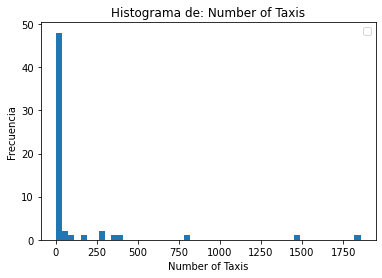

No handles with labels found to put in legend.


Avg trips per TaxiCruz_Ramirez_Nicolas.png


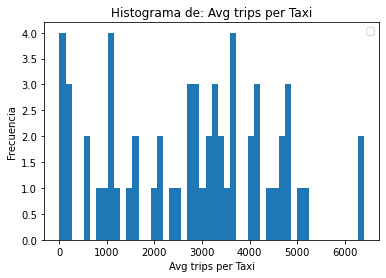

No handles with labels found to put in legend.


Avg fare per tripCruz_Ramirez_Nicolas.png


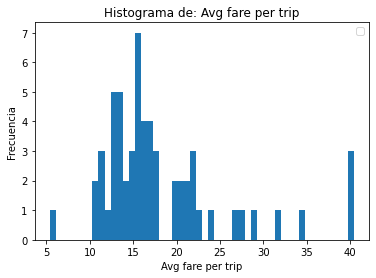

No handles with labels found to put in legend.


Avg tip per tripCruz_Ramirez_Nicolas.png


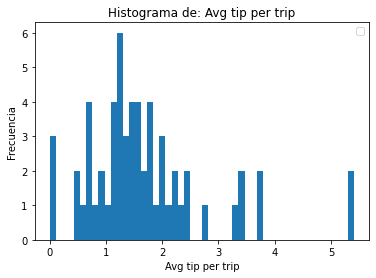

No handles with labels found to put in legend.


Avg tools per tripCruz_Ramirez_Nicolas.png


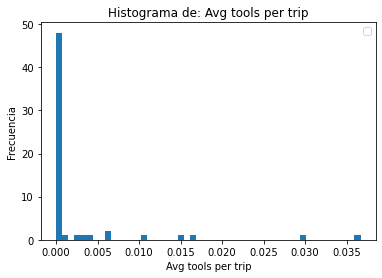

No handles with labels found to put in legend.


Avg extras per tripCruz_Ramirez_Nicolas.png


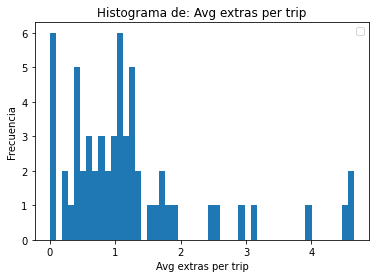

No handles with labels found to put in legend.


Avg duration per tripCruz_Ramirez_Nicolas.png


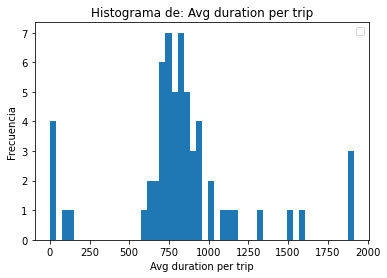

No handles with labels found to put in legend.


Full trips durationCruz_Ramirez_Nicolas.png


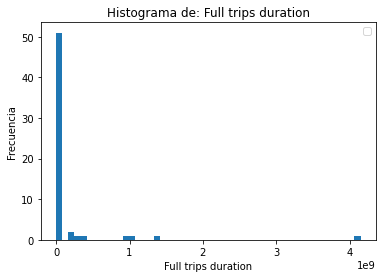

No handles with labels found to put in legend.


Avg distance per tripCruz_Ramirez_Nicolas.png


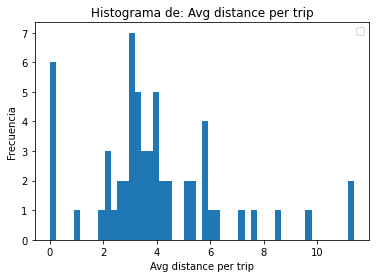

No handles with labels found to put in legend.


Full distanceCruz_Ramirez_Nicolas.png


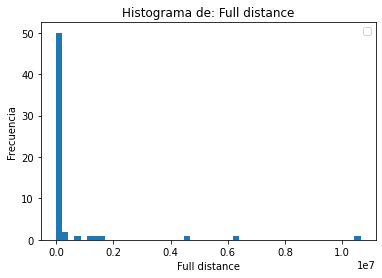

No handles with labels found to put in legend.


Max distance in a tripCruz_Ramirez_Nicolas.png


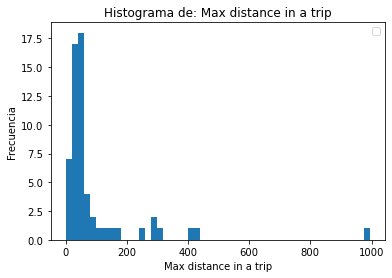

No handles with labels found to put in legend.


Min distance in a tripCruz_Ramirez_Nicolas.png


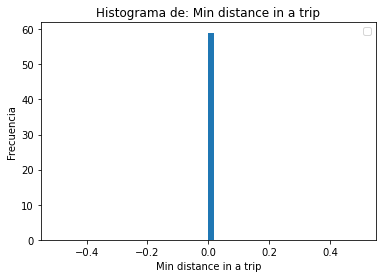

No handles with labels found to put in legend.


Max time for a tripCruz_Ramirez_Nicolas.png


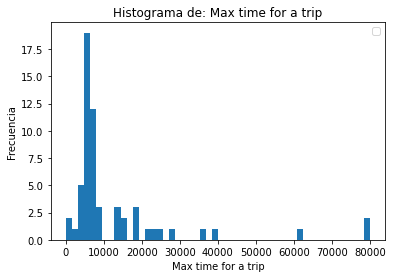

No handles with labels found to put in legend.


Min time for a tripCruz_Ramirez_Nicolas.png


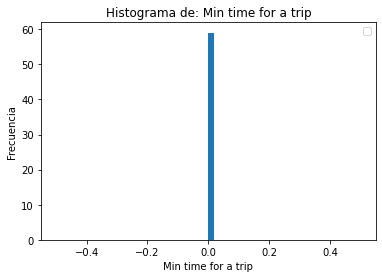

No handles with labels found to put in legend.


Max trips TaxiCruz_Ramirez_Nicolas.png


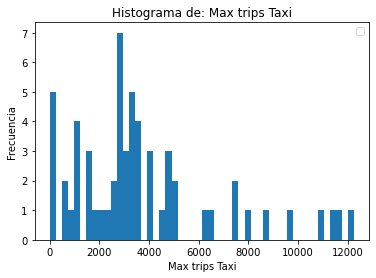

No handles with labels found to put in legend.


Min trips TaxiCruz_Ramirez_Nicolas.png


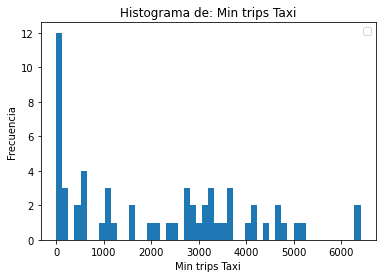

In [31]:
# VARIABLES CONTINUAS - HISTOGRAMA
for j in range(0, len(continuas["Tipo"])):
    k = j
    # TRANSPERENCY OF HISTOGRAM
    fig, ax = plt.subplots()
    ax.hist(TAD[continuas.iloc[k,0]], bins=50)
    ax.legend()
    ax.set_xlabel(continuas.iloc[k,0])
    ax.set_ylabel("Frecuencia")
    ax.set_title("Histograma de: " + continuas.iloc[k,0])
    nombre = str(continuas.iloc[k,0])+"Cruz_Ramirez_Nicolas.png"
    print(nombre)
    plt.savefig("Histograma/"+nombre)
    plt.show()

Number of Taxis_Cruz_Ramirez_Nicolas.png


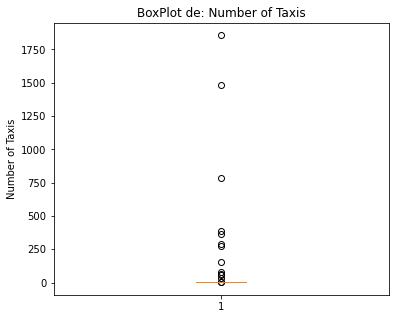

Avg trips per Taxi_Cruz_Ramirez_Nicolas.png


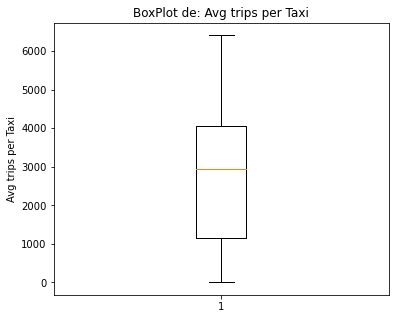

Avg fare per trip_Cruz_Ramirez_Nicolas.png


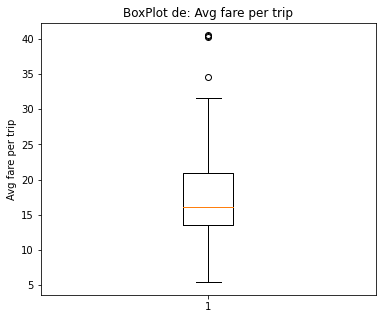

Avg tip per trip_Cruz_Ramirez_Nicolas.png


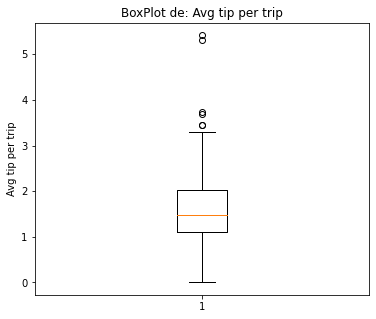

Avg tools per trip_Cruz_Ramirez_Nicolas.png


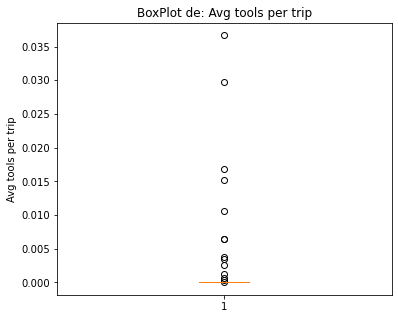

Avg extras per trip_Cruz_Ramirez_Nicolas.png


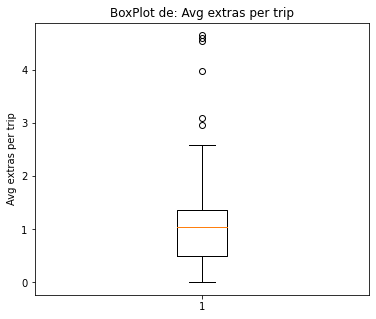

Avg duration per trip_Cruz_Ramirez_Nicolas.png


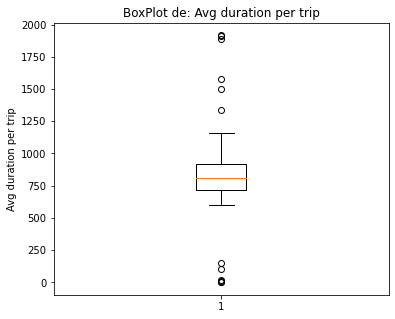

Full trips duration_Cruz_Ramirez_Nicolas.png


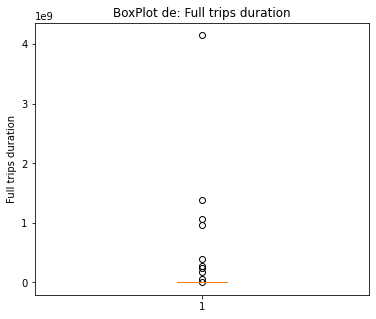

Avg distance per trip_Cruz_Ramirez_Nicolas.png


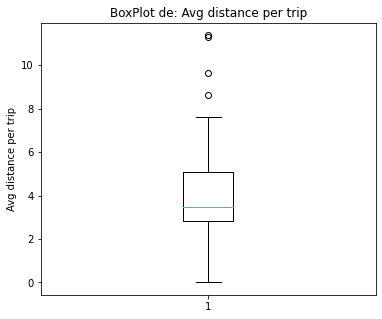

Full distance_Cruz_Ramirez_Nicolas.png


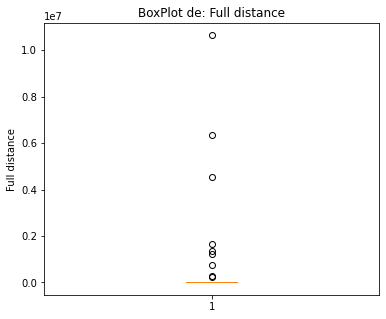

Max distance in a trip_Cruz_Ramirez_Nicolas.png


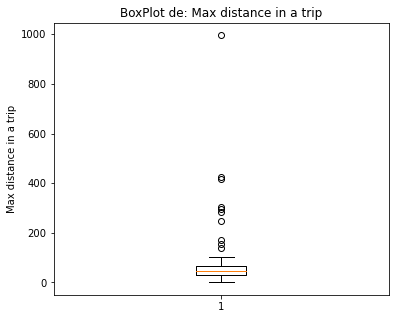

Min distance in a trip_Cruz_Ramirez_Nicolas.png


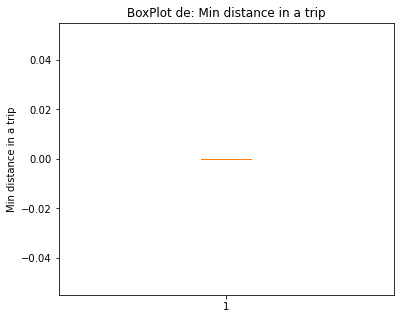

Max time for a trip_Cruz_Ramirez_Nicolas.png


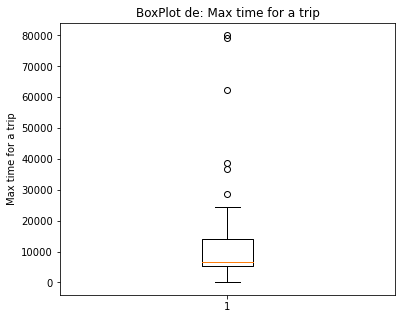

Min time for a trip_Cruz_Ramirez_Nicolas.png


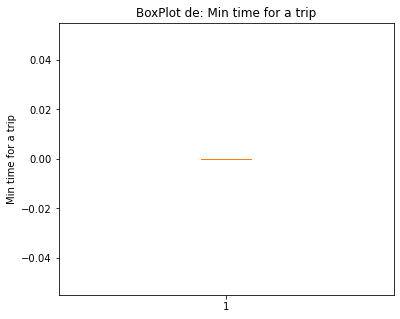

Max trips Taxi_Cruz_Ramirez_Nicolas.png


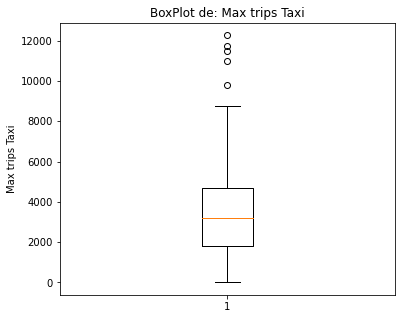

Min trips Taxi_Cruz_Ramirez_Nicolas.png


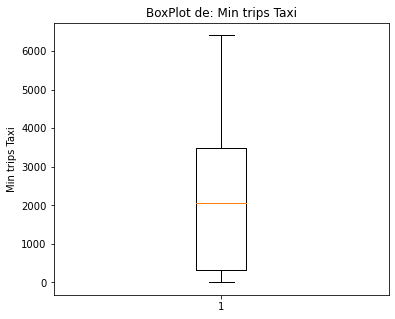

In [32]:
# VARIABLES CONTINUAS - GRAFICO DE CAJAS
for j in range(0, len(continuas["Tipo"])):
    k = j
    fig, ax = plt.subplots()
    fig.set_size_inches(6,5)
    ax.boxplot( [TAD[continuas.iloc[k,0]]  ] )
    ax.set_ylabel(continuas.iloc[k,0])
    ax.set_title("BoxPlot de: " + continuas.iloc[k,0])
    nombre = str(continuas.iloc[k,0])+"_Cruz_Ramirez_Nicolas.png"
    print(nombre)
    plt.savefig("BoxPlot/"+nombre)
    plt.show()

Most Frequent payment option_Cruz_Ramirez_Nicolas.png


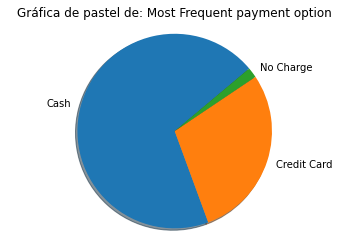

In [33]:
# VARIABLES DISCRETAS - GRAFICO DE PIE
for j in range(1, len(categoricas["Tipo"])):

    k = j
    categoricas.iloc[k,0]

    x = TAD.groupby(categoricas.iloc[k,0])["Company"].count().sort_values(ascending=False)
    x = 100*x/x.sum()
    x = x.reset_index()

    fig1, ax1 = plt.subplots()
    ax1.pie(x["Company"], labels=x[categoricas.iloc[k,0]], shadow=True, startangle=40)
    ax1.axis('equal') 
    ax1.set_title("Gráfica de pastel de: "+categoricas.iloc[k,0])
    nombre = str(categoricas.iloc[k,0])+"_Cruz_Ramirez_Nicolas.png"
    print(nombre)
    plt.savefig("PieChart/"+nombre)
    plt.show()

Most Frequent payment option_Cruz_Ramirez_Nicolas.png


<ipython-input-34-5d92df84f618>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t.index, rotation=0)


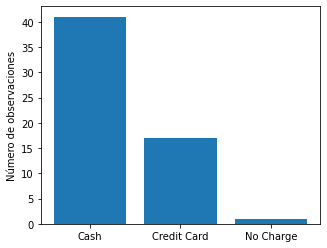

In [34]:
# VARIABLES DISCRETAS - GRAFICO DE BARRAS
for j in range(1, len(categoricas["Tipo"])):
    k = 1

    t = TAD.groupby(categoricas.iloc[k,0])["Company"].count().sort_values(ascending=False)
    fig, ax = plt.subplots()
    fig.set_size_inches(5,4)
    ax.bar(t.index, t.values)
    ax.set_xticklabels(t.index, rotation=0)
    ax.set_ylabel("Número de observaciones")
    ax1.set_title("Gráfica de pastel de: "+categoricas.iloc[k,0])
    nombre = str(categoricas.iloc[k,0])+"_Cruz_Ramirez_Nicolas.png"
    print(nombre)
    plt.savefig("Barplot/"+nombre)
    plt.show() 